In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [2]:
# Read the csv data from and construct a Series object
car_sales = pd.read_csv("../datasets/monthlyCarSales.csv", index_col=0)
car_sales.head()

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587


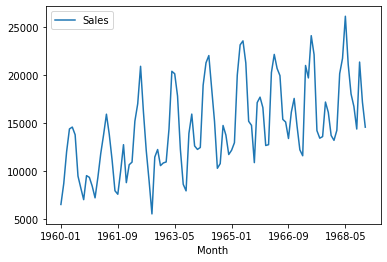

In [3]:
# Plot the data
car_sales.plot()
plt.show()

In [4]:
# Make series stationary and save the data to a new dataset
differenced = car_sales.diff(12)
differenced = differenced[12:]
differenced.to_csv("../datasets/seasonallityAdjustedMonthlyCarSales.csv")

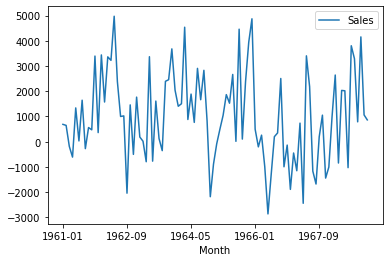

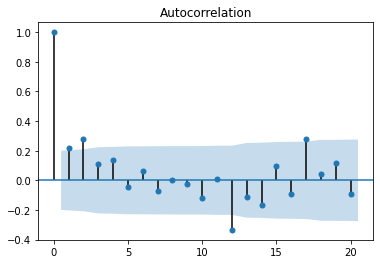

In [5]:
# Plot the seasonally adjusted time series
differenced.plot()
plt.show()
# Plot the correlogram 
plot_acf(differenced)
plt.show()

In [6]:
# Create a dataframe with the t-1 shifted values in order to see the problem as supervised learning
df_columns = ["t-"+str(i) for i in range(12,0,-1)]
df = pd.DataFrame(columns=df_columns, index=differenced.index)
for i in range(12,0,-1):
    print(differenced.shift(i))
    df['t-'+str(i)] = differenced.shift(i)
df['t'] = differenced.values
print(df.head(13))
df = df[13:]

          Sales
Month          
1961-01     NaN
1961-02     NaN
1961-03     NaN
1961-04     NaN
1961-05     NaN
...         ...
1968-08 -1679.0
1968-09   197.0
1968-10  1052.0
1968-11 -1443.0
1968-12 -1007.0

[96 rows x 1 columns]
          Sales
Month          
1961-01     NaN
1961-02     NaN
1961-03     NaN
1961-04     NaN
1961-05     NaN
...         ...
1968-08   197.0
1968-09  1052.0
1968-10 -1443.0
1968-11 -1007.0
1968-12   985.0

[96 rows x 1 columns]
          Sales
Month          
1961-01     NaN
1961-02     NaN
1961-03     NaN
1961-04     NaN
1961-05     NaN
...         ...
1968-08  1052.0
1968-09 -1443.0
1968-10 -1007.0
1968-11   985.0
1968-12  2643.0

[96 rows x 1 columns]
          Sales
Month          
1961-01     NaN
1961-02     NaN
1961-03     NaN
1961-04     NaN
1961-05     NaN
...         ...
1968-08 -1443.0
1968-09 -1007.0
1968-10   985.0
1968-11  2643.0
1968-12  -846.0

[96 rows x 1 columns]
          Sales
Month          
1961-01     NaN
1961-02     NaN
1961-03     

In [9]:
# Separate the data
data_array = df.values
X = data_array[:, 0:-1]
y = data_array[:, -1]

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
f_importances = model.feature_importances_

[0.21642244 0.06271259 0.05662302 0.05543768 0.07155573 0.08478599
 0.07699371 0.05366735 0.1033234  0.04897883 0.1066669  0.06283236]


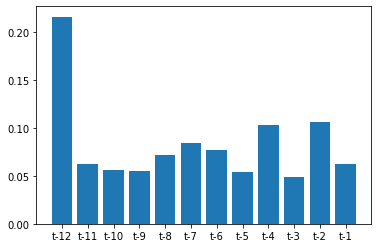

In [8]:
# Print and plot results
print("Feature importances")
print(f_importances)
names = df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

In [13]:
# Do the same but by using RFE feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

t-12
t-6
t-4
t-2


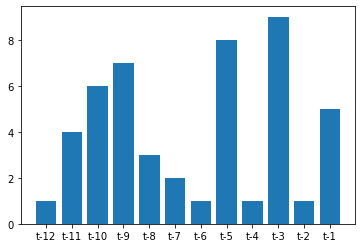

In [16]:
# Print and plot results
print("Important")
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()